# Przygotowanie środowiska

+ zainstalować Python
+ przygotować wirutalne środowisko: `python -m virtualenv venv`
+ zainstalować paczki (można użyć również pliku requirements.txt):  `pip install jupyterlab, matplotlib, scikit-learn, pandas`

# Uczenie maszynowe

Wyróżnia się trzy rodzaje uczenia maszynowego:

    + uczenie nadzorowane (ang. supervised)
    + uczenie nienadzorowane (ang. unsupervised)
    + uczenie ze wzmocnieniem (ang. reinforcement)
    
<img alt="Trzy typy uczenia maszynowego" src="https://www.newtechdojo.com/wp-content/uploads/2020/06/ML-Types-1-1024x741.png" width="640"/>


# Uczenie nadzorowane

Na podstawie danych chcemy zrealizować określone zadanie:

+ klasyfikacja - na podstawie cech przypisuje się jedną z etykiet
  - Przykład: klasyfikacja napisanych ręcznie cyfr
+ regresja - próba znalezienia pewnych zależności pomiędzy wejściem a wyjściem 
  - Przykład: modelowanie zależności temperatury w pokoju od temperatury zewnętrznej oraz ustawienia termostatu

# Klasyfikacja - przykład


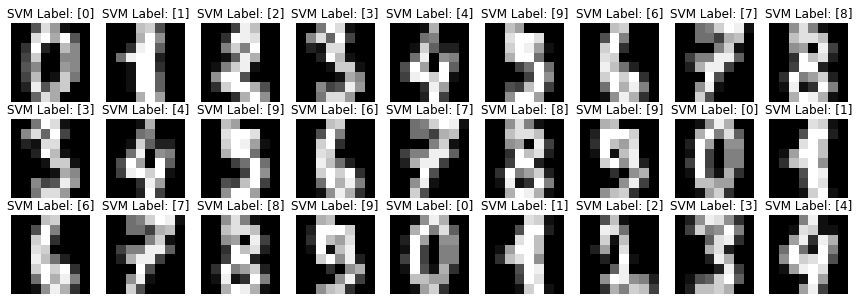

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       0.99      1.00      0.99       182
           2       1.00      1.00      1.00       177
           3       0.99      1.00      1.00       183
           4       1.00      1.00      1.00       181
           5       0.99      0.99      0.99       182
           6       1.00      1.00      1.00       181
           7       0.99      1.00      1.00       179
           8       1.00      0.99      0.99       174
           9       0.99      0.98      0.99       180

    accuracy                           1.00      1797
   macro avg       1.00      1.00      1.00      1797
weighted avg       1.00      1.00      1.00      1797



In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report


digits = load_digits()

n_rows = 3
n_cols = 9
_, axes  = plt.subplots(n_rows, n_cols, figsize=(15,5))

svc = svm.SVC()
svc.fit(digits.data, digits.target) # learning


plt.gray()
for i in range(n_rows):
    for j in range(n_cols):
        samples_index = n_rows * i + j
        axes[i][j].imshow(digits.images[samples_index])
        axes[i][j].axis('off')
        axes[i][j].set_title(f'SVM Label: {svc.predict(digits.data[samples_index].reshape(1, -1))}')

plt.show()
print(classification_report(digits.target, svc.predict(digits.data)))

# Generowanie danych

Zostaną wygenerowane dane w taki sposób, że punkty powyżej prostej $y=2x-1$ będą miały etykietę $1$, w.p.p. zostania nadana etykieta $0$.

In [38]:
import numpy as np


def generate_dataset(a, b):
    
    x = (np.random.rand(200) - 0.5) * 10
    N = x.shape[0]
    y = a * x + b
    
    y_mult = y + 8*y*(np.random.rand(N) - 0.5)
    
    labels = y_mult > y
    labels = np.logical_xor(np.random.choice([0, 1], size=N, p=[0.8, 0.2]), labels)
    
    return x, y_mult, labels.astype(int)

x, y, labels = generate_dataset(2, 1)


# Wizualizacja zbioru danych

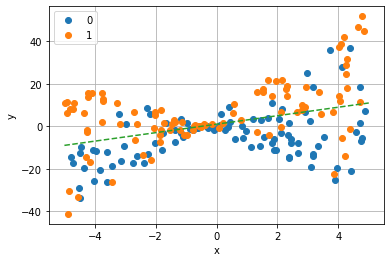

In [39]:
from matplotlib import pyplot as plt

def plot_dataset(x, y, labels):
    unique_labels = np.unique(labels)
    
    for label in unique_labels:
        x_label = x[label == labels]
        y_label = y[label == labels]
                    
        plt.plot(x_label, y_label, 'o', label=label)
    
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(unique_labels)
    
plot_dataset(x, y, labels)
x_line = np.linspace(-5,5,100)
y_line = 2*x_line+1
plt.plot(x_line, y_line, '--')

# Uczenie MLP

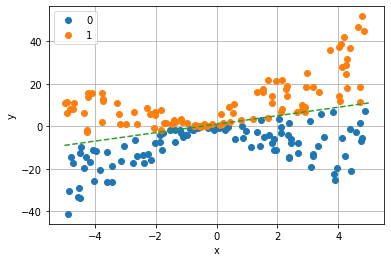

In [40]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(alpha=1, max_iter=1000)

features = np.array([x, y]).T

mlp_classifier.fit(features, labels)

labels_predicted = mlp_classifier.predict(features)

plot_dataset(x, y, labels_predicted)
plt.plot(x_line, y_line, '--')

# Metryki

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(labels, labels_predicted))
print(confusion_matrix(labels, labels_predicted))




              precision    recall  f1-score   support

           0       0.74      0.76      0.75        98
           1       0.76      0.75      0.75       102

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200

[[74 24]
 [26 76]]


# Wizualizacja procesu uczenia

<module 'matplotlib.pyplot' from '/home/mochman/Projects/uam/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

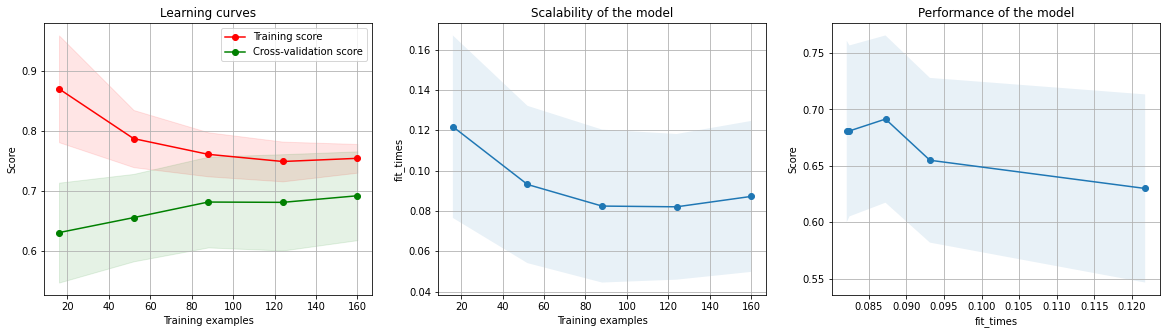

In [42]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)


plot_learning_curve(mlp_classifier, 'Learning curves', features, labels, cv=cv, n_jobs=4)

# Regresja / predykcja - przykład

9.878289489958446


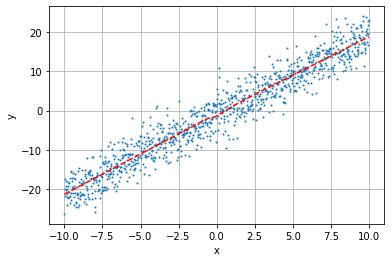

In [51]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(100)
def gen_line(): 
    x = np.linspace(-10, 10, 1000)
    y = 2 * x - 1
    return x, y + np.random.normal(loc=0, scale=3, size=x.shape)

mlp = MLPRegressor(hidden_layer_sizes=(10, ), max_iter=5000)

x, y = gen_line()
features = np.array([x]).T

mlp.fit(features, y)

plt.plot(x, y, '.', markersize=2)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, mlp.predict(features), 'r--')

print(mean_squared_error(y, mlp.predict(features)))

# Klasteryzacja 

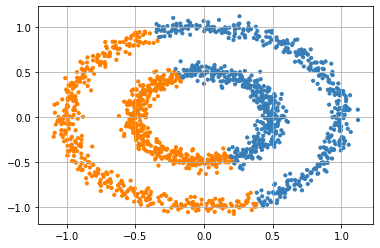

In [52]:
from sklearn.datasets import make_circles
from sklearn.cluster import MiniBatchKMeans
n_samples = 1500
X, y = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

two_means = MiniBatchKMeans(n_clusters=2)
two_means.fit(X)
y_pred = two_means.predict(X)
colors = np.array(["#377eb8", "#ff7f00", "#4daf4a"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
plt.grid()


# Uczenie ze wzmocnieniem

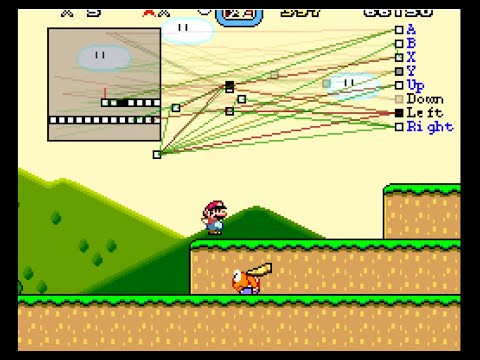

In [45]:
from IPython.display import YouTubeVideo

YouTubeVideo('qv6UVOQ0F44', width=800, height=400)

# Klasyczne algorytmy uczenia maszynowego

Do klasycznych algorytmów zalicza się m.in.:

+ sieci neuronowe (MLP)
+ metody statystyczne
+ SVM
+ liniowa regresja

# Cechy

Czy wszystkie cechy są potrzebne?



[0.80094048 0.09245075 0.07946709 0.02714167]
(200, 4)


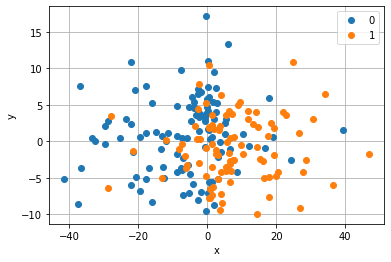

In [46]:
from sklearn.decomposition import PCA

def plot_dataset(x, y, labels):
    unique_labels = np.unique(labels)
    
    for label in unique_labels:
        x_label = x[label == labels]
        y_label = y[label == labels]
                    
        plt.plot(x_label, y_label, 'o', label=label)
    
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(unique_labels)

def generate_dataset(a, b):
    
    x = (np.random.rand(200) - 0.5) * 10
    N = x.shape[0]
    y = a * x + b
    
    y_mult = y + 8*y*(np.random.rand(N) - 0.5)
    
    labels = y_mult > y
    labels = np.logical_xor(np.random.choice([0, 1], size=N, p=[0.8, 0.2]), labels)
    
    return x, y_mult, labels.astype(int)


def gen_dataset_with_noisy_features():
    x, y, labels = generate_dataset(2, 1)
    
    return np.array([x, y, np.random.normal(size=x.shape, loc=0.0, scale=5), np.random.normal(size=x.shape, loc=0.0, scale=5)]).T, labels

                    
X, labels = gen_dataset_with_noisy_features()

pca = PCA()

pca.fit(X)

print(pca.explained_variance_ratio_)

X_transformed = pca.transform(X)
print(X.shape)
plot_dataset(X_transformed[:, 0], X_transformed[:, 1], labels)

# Wybór cech

Best parameter (CV score=0.924):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 60}


/home/mochman/Projects/uam/venv/lib/python3.10/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


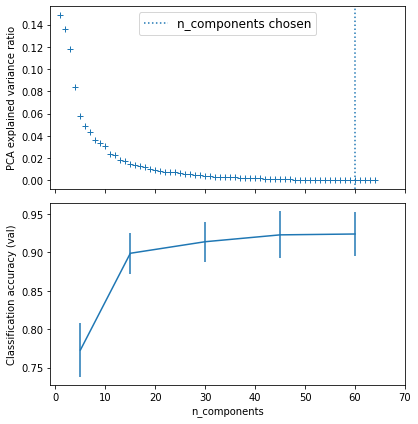

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

X_digits, y_digits = datasets.load_digits(return_X_y=True)
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    "logistic__C": np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

# Wskazówki
+ wizualizować wszystko
+ stosować poprawne algorytmy (wiedzieć, jakie założenia muszą być spełnione)
+ czytać dokumentację
+ każdy krok powinien być poparty pewnymi obserwacjami
+ dzielić zbiór na zbiór treningowy i testowy

# Wspólne programowanie (?)